In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


from helpers import *
from gaussfit import *
from fit_double_exp import fitDualExp, dualexpo


# Define source parameters 
sdir   = "../calibrationdb/"
vfile  = "../../gain/hvdb/Sy4527channels_13122021_nominal.sub"
trange = (1637788392, 1639439128)
adders = 0

# Import data between November and December 2021
data   = dataLoader( sdir, vfile, trange, adders )

Import data in folder../calibrationdb/ for interval (1637788392:1639439128)
Import voltage info from ../../gain/hvdb/Sy4527channels_13122021_nominal.sub


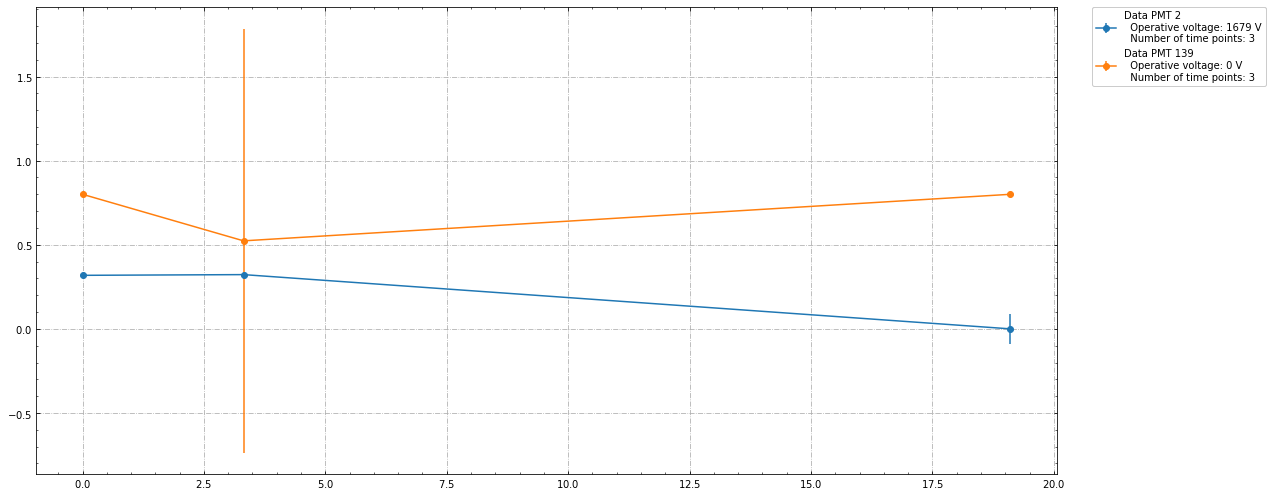

ALL DONE


In [12]:
fig, ax = plt.subplots(1,1, figsize=(15, 7))

for PMT in [2, 139] :   
        df = data[data.pmt==PMT]
        
        # fixed parameters
        pmt = df.pmt.values[0]
        voltage=df.voltage.values[0]
        tmin = trange[0]
        
        # Extract the data of interest. Convert timestamps in days
        t = np.array([ (tt-tmin) / (3600*24) for tt in df.index ]) #in days
        q = np.array(df["q"])
        eq = np.array(df["eq"])
        npoints = len(q)
    
        # Make the data plot
        if npoints ==0 or np.isnan(voltage):
            print("PMT {} has no correct data associated".format(pmt))
            continue
        label='\n'.join( ['Data PMT %d' % pmt,  
                      '  Operative voltage: %d V' % voltage, 
                      '  Number of time points: %d' % npoints])
        out = ax.errorbar( x=t, y=q, yerr=eq, fmt='o-', label=label)
        
        
        legend = fig.legend(fontsize=10, bbox_to_anchor=[1.18, 0.99])
        legend.get_frame().set_alpha(None)
        fig.tight_layout()
        
plt.show()
                
print("ALL DONE")